# 권역별(공간적) 재난지원금 주요 사용처 분석

기본적으로 공간적(권역별)로 재난지원금이 얼마나 사용되었는지 어디에 주로 사용되었는지 살펴볼 필요성이 있다. 이를 분석한 뒤에 지리적 특성, 그리고 권역에 따른 특성에 대입하여 살펴볼 필요가 있다. 이를 최종적으로 재난지원금이 적절한 곳에 사용되었는지와 연관시켜볼 수 있다. 이를 위해서는 추후에 권역별로 어떤 상업이 발달했는지 분석하고, 재난지원금 목적의 대상이 되는 상업과 연관이 있는지 살펴볼 필요가 있다.

In [1]:
import numpy as np
import pandas as pd

## 나중에 데이터 다 모이면 이 부분 수정해야합니다!!!!! (중요!!!!!!!!)
## (또한 밑에 라벨링도 다 새로 해야합니다 ㅎㅎㅎㅎㅎ

In [2]:
data_05 = pd.read_csv("./data/data_05.csv")
data_06 = pd.read_csv("./data/data_06.csv")
data_08 = pd.read_csv("./data/data_08.csv")

In [3]:
data = pd.concat([data_05, data_06, data_08])
data = data.reset_index(drop=True)

In [4]:
data["DONG"].unique()

array(['한경면', '대정읍', '한림읍', '안덕면', '애월읍', '추자면', '하예동', '상예동', '색달동',
       '중문동', '외도이동', '대포동', '외도일동', '내도동', '회수동', '도평동', '해안동', '이호일동',
       '이호이동', '하원동', '월평동', '도두일동', '노형동', '도순동', '도두이동', '강정동', '연동',
       '용담삼동', '용담이동', '영남동', '오라삼동', '오라이동', '법환동', '서호동', '용담일동',
       '오라일동', '삼도일동', '삼도이동', '오등동', '호근동', '도남동', '이도일동', '일도일동', '건입동',
       '이도이동', '일도이동', '아라일동', '아라이동', '화북이동', '서홍동', '서귀동', '동홍동',
       '화북일동', '영평동', '토평동', '도련일동', '삼양이동', '봉개동', '도련이동', '보목동', '삼양일동',
       '상효동', '신효동', '하효동', '조천읍', '회천동', '남원읍', '구좌읍', '표선면', '성산읍',
       '우도면', '삼양삼동', '용강동'], dtype=object)

In [5]:
data.replace(dict.fromkeys(['택시', '기타교통수단', '통신기기'], '교통/통신'), inplace=True)
data.replace(dict.fromkeys(['대형할인점', '농축협직영매장', '농협하나로클럽', '편의점', '슈퍼마켓', '정육점', '기타유통업', '연쇄점', '상품권', '인삼제품', '홍삼제품', '농축수산품', '주류판매점', '기타건강식', '건강식품(회원제형태)'], '마트/편의점(유통)'), inplace=True)
data.replace(dict.fromkeys(['악기점', 'DVD음반테이프판매', '문화취미기타', '영화관', '티켓', '수족관', '화랑'], '영화/문화'), inplace=True)
data.replace(dict.fromkeys(['내의판매점', '양품점', '옷감직물', '귀금속', '기타직물', '스포츠의류', '가방', '정장', '악세사리', '기타잡화', '신발', '기타의류', '단체복', '아동의류', '캐쥬얼의류', '맞춤복점', '제화점', '인터넷Mall', '인터넷종합Mall'], '쇼핑/패션'), inplace=True)
data.replace(dict.fromkeys(['제과점', '스넥', '기타음료식품'], '카페/베이커리'), inplace=True)
data.replace(dict.fromkeys(['미용재료', '화장품', '피부미용실', '미용원', '이용원'], '뷰티'), inplace=True)
data.replace(dict.fromkeys(['구내매점', '단란주점', '주점', '서양음식', '일반한식', '일식회집', '중국음식',  '유흥주점', '칵테일바'], '외식/주점'), inplace=True)
data.replace(dict.fromkeys(['세탁소', '애완동물', '화원', '침구수예점', '성인용품점', '가전제품', '기타가구', '조명기구', '민예공예품', '주방용식기', '기타전기제품', '소프트웨어', '주방용구', '카페트커텐천막', '컴퓨터', '카메라', '일반가구', '정수기', '철제가구', '시계', '안경', '사우나', '안마스포츠마사지', '사진관', '인테리어', 'CATV'], '생활/기타'), inplace=True)
data.replace(dict.fromkeys(['완구점', '화방표구점', '문구용품', '일반서적', '출판인쇄물', '기타사무용', '사무기기', '전문서적', '정기간행물', '기타서적문구', '서적출판(회원제형태)'], '서점/문구'), inplace=True)
data.replace(dict.fromkeys(['기타보험', '손해보험'], '금융'), inplace=True)
data.replace(dict.fromkeys(['기념품점', '기타숙박업', '특급호텔', '2급호텔', '1급호텔', '콘도', '렌트카', '관광여행', '항공사', '여객선', '면세점'], '여행/숙박'), inplace=True)
data.replace(dict.fromkeys(['레져용품수리', '스포츠레져용품', '골프용품', '노래방', '당구장', '골프경기장', '볼링장', '골프연습장', '헬스크럽', '레져업소(회원제형태)', '기타레져업', '종합레져타운', '수영장', '테니스장', '기타회원제형태업소', ], '레저/스포츠'), inplace=True)
data.replace(dict.fromkeys(['유아원', '독서실', '보습학원', '기능학원', '기타교육', '외국어학원', '학원(회원제형태)', '예체능학원', '컴퓨터학원', '대학등록금', '학습지교육', '초중고교육기관'], '교육/육아'), inplace=True)
data.replace(dict.fromkeys(['주유소', '자동차정비', 'LPG', '세차장', '유류판매', '이륜차판매', '윤활유전문판매', '자동차시트타이어', '중고자동차', '수입자동차', '자동차부품', '주차장', '기타자동차서비스', '카인테리어', ], '주유/자동차'), inplace=True)
data.replace(dict.fromkeys(['약국', '종합병원', '기타의료기관및기기', '한약방', '제약회사', '의료용품', '건강진단', '한의원', '동물병원', '의원', '치과의원', '병원', '산후조리원', '치과병원'], '의료'), inplace=True)
data.replace(dict.fromkeys(['목재석재철물', '건축요업품', '골동품점', '기계공구', '기타건축자재', '보일러펌프', '페인트', '냉열기기', '유리', '과학기자재', '기타광학품', '기타연료', '중장비수리', ], '건설/제조'), inplace=True)
data.replace(dict.fromkeys(['기타농업관련', '비료농약사료종자', '농기계', '미곡상'], '농업'), inplace=True)
data.replace(dict.fromkeys(['사무서비스', '기타대인서비스', '화물운송', '보관창고업', '종합용역', '조세서비스', '가례서비스', '공공요금', '위탁급식업', '기타용역서비스', '기타수리서비스', '기타운송', '가정용품수리', '견인서비스', '부동산중개임대', '부동산분양', '신변잡화수리', '사무통신기기수리', '법률회계서비스', '사무서비스(회원제형태)', '정보서비스', '기타업종', '기타비영리유통'], '서비스/기타'), inplace=True)

## 1. 권역 설정

In [6]:
area_west_jeju = ['한경면', '한림읍', '애월읍']
area_east_jeju = ['조천읍', '구좌읍']
area_urban_jeju = ['외도이동', '외도일동', '내도동', '도평동', '해안동', '이호일동', '이호이동', '월평동', '도두일동', '노형동', '도두이동', '연동', '용담삼동', '용담이동', '오라삼동', '오라이동', '용담일동', '오라일동', '삼도일동', '삼도이동', '오등동', '도남동', '이도일동', '일도일동', '건입동', '이도이동', '일도이동', '아라일동', '아라이동', '화북이동', '화북일동', '영평동', '삼양삼동', '도련일동', '삼양이동', '봉개동', '도련이동', '삼양일동', '회천동', '용강동']
area_west_seoguipo = ['대정읍', '안덕면']
area_east_seoguipo = ['남원읍', '표선면', '성산읍']
area_urban_seoguipo = ['하예동', '상예동', '색달동', '중문동', '대포동', '하원동', '도순동', '강정동', '법환동', '서호동', '호근동', '서홍동', '서귀동', '동홍동', '토평동', '보목동', '상효동', '신효동', '하효동', '회수동', '영남동']
area_etc = ['추자면', '우도면']

In [7]:
data["AREA"] = ""
data.head(3)

,Unnamed: 0,Unnamed: 0.1,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,DONG,Unnamed: 0.1.1,AREA
0,0,0.0,1,1,202005,제주특별자치도,제주시,영세,외식/주점,00시,363000,66500,10,2,126.178894,33.302315,한경면,NaN,
1,1,1.0,2,2,202005,제주특별자치도,제주시,영세,외식/주점,00시,1180000,0,3,0,126.178884,33.302766,한경면,NaN,
2,2,2.0,3,3,202005,제주특별자치도,제주시,중소1,마트/편의점(유통),00시,157670,6850,20,2,126.179458,33.300971,한경면,NaN,


In [8]:
condition_list = [
    (data['DONG'].isin(area_west_jeju)) ,
    (data['DONG'].isin(area_urban_jeju)),
    (data['DONG'].isin(area_east_jeju)),
    (data['DONG'].isin(area_west_seoguipo)),
    (data['DONG'].isin(area_urban_seoguipo)),
    (data['DONG'].isin(area_east_seoguipo)),
    (data['DONG'].isin(area_etc))]
choice_list = ['제주서부', '제주', '제주동부', '서귀포서부', '서귀포', '서귀포동부', '기타']
data['AREA'] = np.select(condition_list, choice_list, default='기타')

In [9]:
grouped_spend = data['TotalSpent'].groupby(data['AREA'])

## 2. 권역별 총 사용량 비교

In [10]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
mpl.font_manager._rebuild()

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = "NanumBarunGothic"

In [11]:
label = ['기타', '서귀포', '서귀포동부', '서귀포서부', '제주', '제주동부', '제주서부']

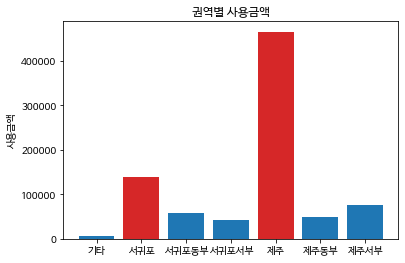

In [12]:
color = ['C0', 'C3', 'C0', 'C0', 'C3', 'C0', 'C0']
plt.bar(label, grouped_spend.size(), color = color)
plt.title('권역별 사용금액')
plt.ylabel('사용금액')
plt.show()

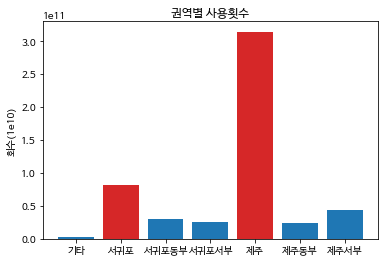

In [13]:
color = ['C0', 'C3', 'C0', 'C0', 'C3', 'C0', 'C0']
plt.bar(label, grouped_spend.sum(), color = color)
plt.title('권역별 사용횟수')
plt.ylabel('회수(1e10)')
plt.show()

## 3. 권역별 주요 사용처 분석

In [14]:
grouped_type = data.groupby(['AREA', 'Type'])
grouped_eachType_spend = grouped_type.sum()["DisSpent"]
grouped_eachType_spend

AREA  Type      
기타    건설/제조           1181520
      교육/육아                 0
      교통/통신             40000
      레저/스포츠          1502000
      마트/편의점(유통)     56043370
                      ...    
제주서부  영화/문화           8946290
      외식/주점         552002344
      의료             82790826
      주유/자동차        242842742
      카페/베이커리        62971787
Name: DisSpent, Length: 117, dtype: int64

In [15]:
A_top_spent = grouped_eachType_spend["제주서부"].sort_values(ascending=False)[0:10]
A_top_spent

Type
마트/편의점(유통)    1235638839
외식/주점          552002344
주유/자동차         242842742
농업             146558277
의료              82790826
카페/베이커리         62971787
쇼핑/패션           52591272
생활/기타           48387804
건설/제조           40618304
레저/스포츠          23158228
Name: DisSpent, dtype: int64

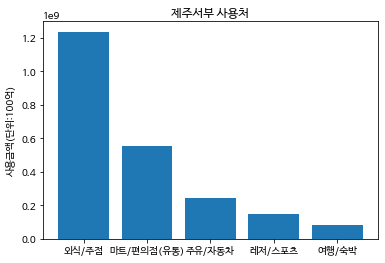

In [16]:
label = ['외식/주점', '마트/편의점(유통)', '주유/자동차', '레저/스포츠', '여행/숙박']
plt.bar(label, A_top_spent[0:5])
plt.title('제주서부 사용처')
plt.ylabel('사용금액(단위:100억)')
plt.show()

In [17]:
B_top_spent = grouped_eachType_spend["제주"].sort_values(ascending=False)[0:10]
B_top_spent

Type
마트/편의점(유통)    7393145412
외식/주점         4808584976
의료            2051654796
주유/자동차        1502062711
쇼핑/패션         1218665642
레저/스포츠        1215771703
생활/기타          995372224
카페/베이커리        762726055
교육/육아          665886992
뷰티             461040455
Name: DisSpent, dtype: int64

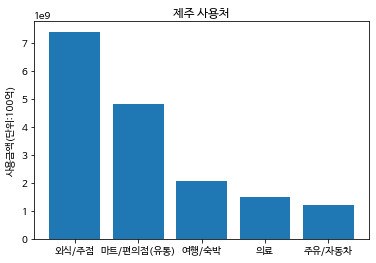

In [18]:
label = ['외식/주점', '마트/편의점(유통)', '여행/숙박', '의료', '주유/자동차']
plt.bar(label, B_top_spent[0:5])
plt.title('제주 사용처')
plt.ylabel('사용금액(단위:100억)')
plt.show()

In [19]:
C_top_spent = grouped_eachType_spend["제주동부"].sort_values(ascending=False)[0:10]
C_top_spent

Type
마트/편의점(유통)    449994718
외식/주점         318847436
주유/자동차        158096214
카페/베이커리        49648747
농업             34375506
의료             31913530
생활/기타          20842143
서비스/기타         16517850
건설/제조          13978140
쇼핑/패션          11467724
Name: DisSpent, dtype: int64

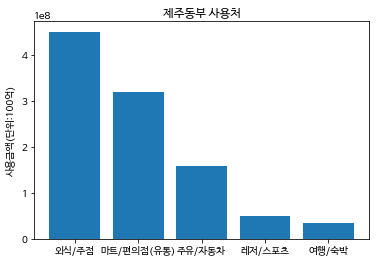

In [20]:
label = ['외식/주점', '마트/편의점(유통)', '주유/자동차', '레저/스포츠', '여행/숙박']
plt.bar(label, C_top_spent[0:5])
plt.title('제주동부 사용처')
plt.ylabel('사용금액(단위:100억)')
plt.show()

In [21]:
D_top_spent = grouped_eachType_spend["서귀포서부"].sort_values(ascending=False)[0:10]
D_top_spent

Type
마트/편의점(유통)    515643767
외식/주점         349874664
주유/자동차        144198096
의료             54006120
농업             51927789
카페/베이커리        49302677
서비스/기타         38800717
레저/스포츠         29542897
생활/기타          27438488
건설/제조          19324345
Name: DisSpent, dtype: int64

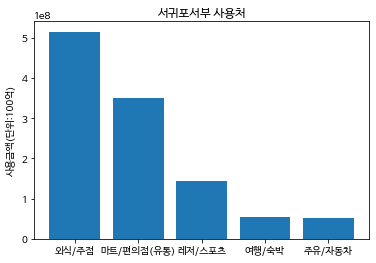

In [22]:
label = ['외식/주점', '마트/편의점(유통)', '레저/스포츠', '여행/숙박', '주유/자동차']
plt.bar(label, D_top_spent[0:5])
plt.title('서귀포서부 사용처')
plt.ylabel('사용금액(단위:100억)')
plt.show()

In [23]:
E_top_spent = grouped_eachType_spend["서귀포"].sort_values(ascending=False)[0:10]
E_top_spent

Type
마트/편의점(유통)    1923958937
외식/주점         1281323296
주유/자동차         551156564
의료             357671896
레저/스포츠         304612455
쇼핑/패션          257065748
카페/베이커리        193009666
생활/기타          171454944
뷰티              93268707
교육/육아           81036040
Name: DisSpent, dtype: int64

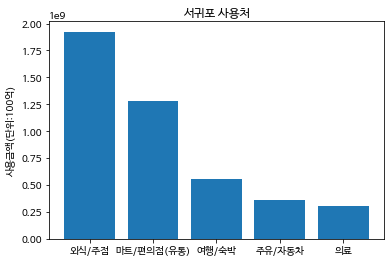

In [24]:
label = ['외식/주점', '마트/편의점(유통)', '여행/숙박', '주유/자동차', '의료']
plt.bar(label, E_top_spent[0:5])
plt.title('서귀포 사용처')
plt.ylabel('사용금액(단위:100억)')
plt.show()

In [25]:
F_top_spent = grouped_eachType_spend["서귀포동부"].sort_values(ascending=False)[0:10]
F_top_spent

Type
마트/편의점(유통)    856271710
외식/주점         416805489
주유/자동차        216951390
의료             94187623
카페/베이커리        94025930
건설/제조          52581972
쇼핑/패션          34014974
생활/기타          29660420
농업             25579962
뷰티             17714760
Name: DisSpent, dtype: int64

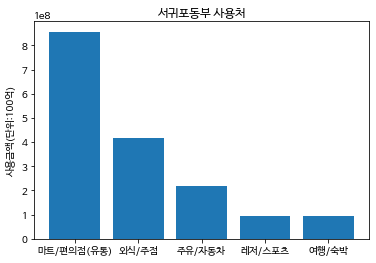

In [26]:
label = ['마트/편의점(유통)', '외식/주점', '주유/자동차', '레저/스포츠', '여행/숙박']
plt.bar(label, F_top_spent[0:5])
plt.title('서귀포동부 사용처')
plt.ylabel('사용금액(단위:100억)')
plt.show()

In [27]:
G_top_spent = grouped_eachType_spend["기타"].sort_values(ascending=False)[0:10]
G_top_spent

Type
마트/편의점(유통)    56043370
외식/주점         33712409
주유/자동차        21632030
카페/베이커리        7243191
의료             2440880
여행/숙박          1836794
서비스/기타         1552380
레저/스포츠         1502000
쇼핑/패션          1326830
건설/제조          1181520
Name: DisSpent, dtype: int64

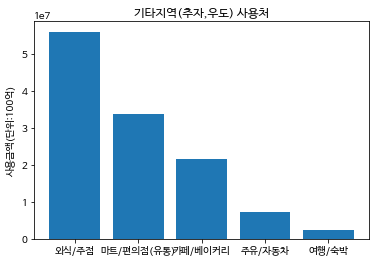

In [28]:
label = ['외식/주점', '마트/편의점(유통)', '카페/베이커리', '주유/자동차', '여행/숙박']
plt.bar(label, G_top_spent[0:5])
plt.title('기타지역(추자,우도) 사용처')
plt.ylabel('사용금액(단위:100억)')
plt.show()

위 결과를 보면 시외권과 시내권의 특성이 매우 분명하게 드러나고, 기타 지역의 경우에 낚시 등의 레저가 발달한 것을 분명하게 살펴볼 수 있다.

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

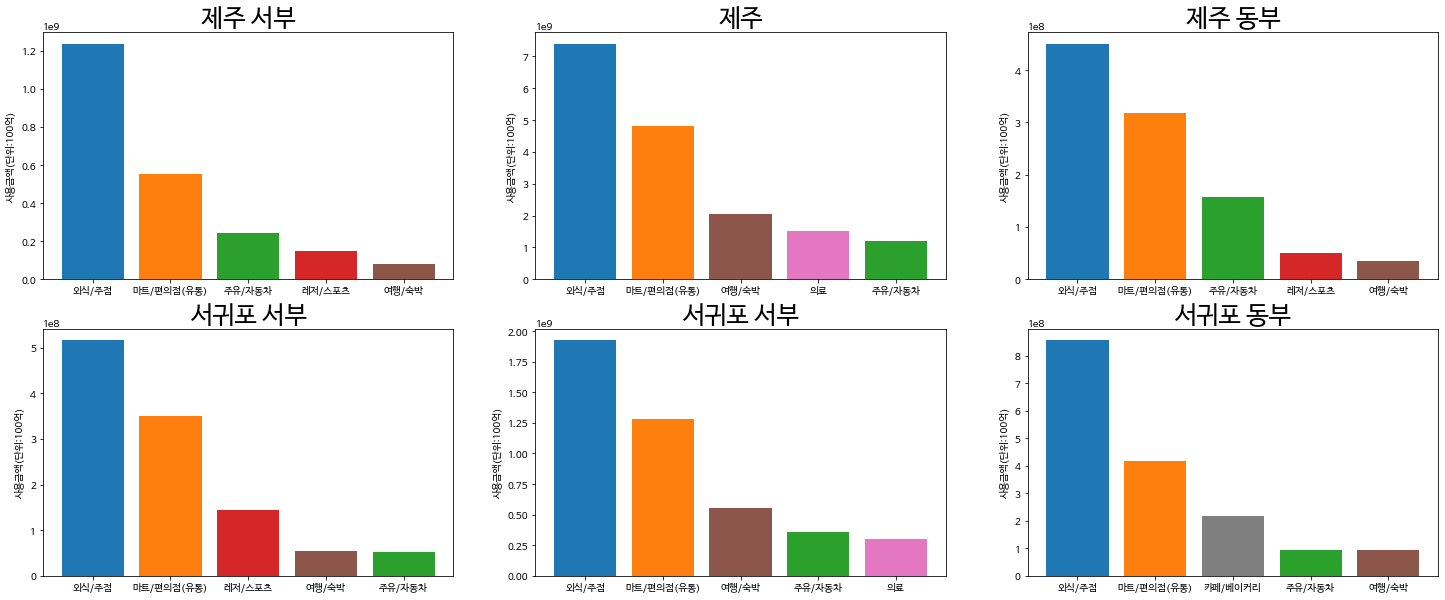

In [29]:
plt.figure(figsize=(25,10))

food = 'C0'
mart = 'C1'
gas = 'C2'
sport = 'C3'
agri = 'C4'
tour = 'C5'
hospit = 'C6'
cafe = 'C7'

plt.subplot(231)
label = ['외식/주점', '마트/편의점(유통)', '주유/자동차', '레저/스포츠', '여행/숙박']
color = [food, mart, gas, sport, tour]
plt.bar(label, A_top_spent[0:5], color=color)
plt.title('제주 서부', size=25)
plt.ylabel('사용금액(단위:100억)')
plt.grid

plt.subplot(232)
label = ['외식/주점', '마트/편의점(유통)', '여행/숙박', '의료', '주유/자동차']
color = [food, mart, tour, hospit, gas]
plt.bar(label, B_top_spent[0:5], color=color)
plt.title('제주', size=25)
plt.ylabel('사용금액(단위:100억)')
plt.grid

plt.subplot(233)
label = ['외식/주점', '마트/편의점(유통)', '주유/자동차', '레저/스포츠', '여행/숙박']
color = [food, mart, gas, sport, tour]
plt.bar(label, C_top_spent[0:5], color=color)
plt.title('제주 동부', size=25)
plt.ylabel('사용금액(단위:100억)')
plt.grid

plt.subplot(234)
label = ['외식/주점', '마트/편의점(유통)', '레저/스포츠', '여행/숙박', '주유/자동차']
color = [food, mart, sport, tour, gas]
plt.bar(label, D_top_spent[0:5], color = color)
plt.title('서귀포 서부', size=25)
plt.ylabel('사용금액(단위:100억)')
plt.grid

plt.subplot(235)
label = ['외식/주점', '마트/편의점(유통)', '여행/숙박', '주유/자동차', '의료']
color = [food, mart, tour, gas, hospit]
plt.bar(label, E_top_spent[0:5], color = color)
plt.title('서귀포 서부', size=25)
plt.ylabel('사용금액(단위:100억)')
plt.grid

plt.subplot(236)
label = ['외식/주점', '마트/편의점(유통)', '카페/베이커리', '주유/자동차', '여행/숙박']
color = [food, mart, cafe, gas, tour]
plt.bar(label, F_top_spent[0:5], color=color)
plt.title('서귀포 동부', size=25)
plt.ylabel('사용금액(단위:100억)')
plt.grid

보면 레저/스포츠, 의료 분야에서 시내 지역과 시외 지역의 차이가 극명하게 나타난다 그 이유는 제주대학병원, 중앙병원, 서귀포병원 등이 시내에만 있고, 제주도는 이동시간이 적기 때문에 의료를 위해서 차로 이동하기 때문이다. 반면 시내에서는 레저/스포츠가 전혀 나타나지 않고 여행/숙박이 높은 것을 통해, 제주시와 서귀포시에 집중된 호텔의 경향성을 찾아볼 수 있다.

## 전체 그래프 스케일링 진행해야함!! (현재 단위가 다름)

DisSpent 결과와 TotalSpent 결과가 약간의 차이가 있음... 의료를 중심으로 보면, 대형 병원에서 의료를 큰 규모로 많이 진행해서 총 사용금액은 시내에서 의료가 크지만 재난지원금 기준으로 보면 비슷